<center> <h1>DS203 Project
<h2>Impact of COVID-19 on various sectors of stock market and prediction of prices using LSTM

In [1]:
#Libraries for data
import pandas as pd
import numpy as np

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from matplotlib.lines import Line2D

#Library to collect .csv files
import glob
from operator import itemgetter 

from datetime import date

from tabulate import tabulate

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Setting style for plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

### Collection and some pre-processing of data

#### We will be working with the following datasets : 
<span style="font-family:Verdana;">
<ol>
    <li> NIFTY 50     : Whole Market Index
    <li> NIFTY AUTO   : Automboile sector index
    <li> NIFTY BANK   : Banking sector index
    <li> NIFTY FMCG   : Fast Moving Consumer Goods sector index
    <li> NIFTY IT     : Software/IT sector index
    <li> NIFTY MEDIA  : Media sector index
    <li> NIFTY PHARMA : Pharmaceuticals sector index
</ol>
</span>

The datasets have been collected from the following sources : 
1. <a href=https://in.finance.yahoo.com/> Yahoo Finance </a>
2. <a href=https://www.nseindia.com/> NSE India </a>

For the analysis of stock market during Lockdown(s) and Unlock 1.0, we have taken the data from Feb 10,2020 to June 30,2020. (However, for predicting the stock market prices of NIFTY 50 (i.e part B of the project), we have taken data over several years)<br>

As the data has been taken from two sources, there could be a difference in the columns and values(although number of rows will remain the same, since the stock market data has been taken over the same period of time). We will take one from each source and analyze the differences and finally move onto making datasets uniform

In [3]:
NIFTY_50 = pd.read_csv('nifty_50.csv') # Taken from Yahoo Finance
display(NIFTY_50)

NIFTY_AUTO = pd.read_csv('nifty_auto.csv') # Taken from NSE India 
display(NIFTY_AUTO)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-10,12102.349609,12103.549805,11990.750000,12031.500000,12031.500000,524700
1,2020-02-11,12108.400391,12172.299805,12099.000000,12107.900391,12107.900391,480000
2,2020-02-12,12151.000000,12231.750000,12144.299805,12201.200195,12201.200195,411700
3,2020-02-13,12219.549805,12225.650391,12139.799805,12174.650391,12174.650391,501200
4,2020-02-14,12190.150391,12246.700195,12091.200195,12113.450195,12113.450195,622800
...,...,...,...,...,...,...,...
89,2020-06-24,10529.250000,10553.150391,10281.950195,10305.299805,10305.299805,854800
90,2020-06-25,10235.549805,10361.799805,10194.500000,10288.900391,10288.900391,994200
91,2020-06-26,10378.900391,10409.849609,10311.250000,10383.000000,10383.000000,671900
92,2020-06-29,10311.950195,10337.950195,10223.599609,10312.400391,10312.400391,574500


,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,10-Feb-2020,8065.40,8067.35,7820.30,7860.55,120638033,3697.57
1,11-Feb-2020,7923.00,7969.30,7881.35,7892.40,84781272,2719.71
2,12-Feb-2020,7932.30,7961.10,7905.75,7933.80,71096518,2295.05
3,13-Feb-2020,7930.25,7933.40,7873.75,7914.90,87754381,2215.19
4,14-Feb-2020,7933.60,7977.15,7807.30,7822.20,95722834,2873.26
...,...,...,...,...,...,...,...
89,24-Jun-2020,6854.25,6935.75,6727.40,6742.80,237402396,5469.09
90,25-Jun-2020,6681.75,6791.75,6645.15,6737.85,155954852,4330.70
91,26-Jun-2020,6807.40,6808.80,6705.00,6731.45,156655986,3422.76
92,29-Jun-2020,6685.85,6728.65,6605.50,6645.85,152013775,3285.56


We can observe the differences among the datasets as follows:
1. The format of dates are different in both the datasets
2. The second dataset has its float values rounded of to 2 decimal places
3. The column of Volume in first dataset, and Shares Traded in second dataset represent the same
   quantity, but is named differently
4. There is an 'Adj Close' (Adjusted Closing Price) column in first dataset, while second dataset doesn't have it. Similarly, the second dataset has a 'Turnover (Rs. Cr)' column which the first doesn't.

Let's see the datatypes and NaN values in each dataset (Notice, since it is stock market data, checking for only 1 dataset from each source is sufficient)

In [4]:
print(NIFTY_50.info())
print(NIFTY_AUTO.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       94 non-null     object 
 1   Open       94 non-null     float64
 2   High       94 non-null     float64
 3   Low        94 non-null     float64
 4   Close      94 non-null     float64
 5   Adj Close  94 non-null     float64
 6   Volume     94 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               94 non-null     object 
 1   Open               94 non-null     float64
 2   High               94 non-null     float64
 3   Low                94 non-null     float64
 4   Close              94 non-null     float64
 5   Shares Traded      94 non-nu

We don't have any NAN values in or datasets, but the Date is of object type, and not the DateTime type required by mplfinance

We have 7 datasets in total for sector-wise analysis of markets during COVID-19, and for the ease of use, we will make a dictionary of datasets with the name of the index as they key and the dataset as the value, i.e {'Index Name' : Index Dataset}

In [5]:
#Using glob.glob to find all csv files in the current working directory
csv_files = [x[2:] for x in glob.glob('./*.csv')]

In [6]:
#Printing the names of the csv files found
csv_files

['nifty_50.csv',
 'nifty_auto.csv',
 'nifty_bank.csv',
 'nifty_fmcg.csv',
 'nifty_it.csv',
 'nifty_media.csv',
 'nifty_pharma.csv']

In [7]:
'''

Initial processing of data is done as follows:

    1. All the csv files are read using pd.read_csv(), and stored as the value for the corresponding,
       key, i.e {nifty_50 : dataframe('nifty_50.csv')} for example. 
    
    2. Since datasets are taken from two sources, for uniformity, we round all float values present,
       to the minimum of the number of decimals, which in this case comes out to be 2
       
    3. The names of columns don't match, i.e some datasets have the column names as :
        [Open, Close, High, Low, Volume, Adj Close]
        
        While, some datasets have the column names as : 
        [Open, Close, High, Low, Shares Traded, Turnover (Rs. Cr)]
        
        To use all datasets to gether, we drop the columns : Adj Close and Turnover (Rs. Cr). Along
        with that, Shares Traded is renamed as Volume, as they refer to the number of shares traded
    
    4. We will be extensively using a new library mplfinance for the purpose of data visualisation. 
       This requires the 'Date' column to be in DateTime format and the index of dataset to be the
       Date instead of numbers as indices. This is done using inbuilt pandas functions : 
       pd.to_datetime() and <Dataframe Name>.set_index() 
       Changing to datetime, will automatically convert both to the same format of date, which in
       our case is YYYY-MM-DD
       
'''

# Dictionary of datasets
dfs = {}

for csv_file in csv_files:
    
    # Reading the csv file
    dfs[csv_file[:-4]] = pd.read_csv(csv_file)
    
    # Rounding off all values to 2 decimal places
    dfs[csv_file[:-4]] = dfs[csv_file[:-4]].round(2)
    
    names = dfs[csv_file[:-4]].columns.tolist()
    
    # Checking the conditions mentioned in point 3 and dropping / replacing the respective columns
    if('Adj Close' in names):
        dfs[csv_file[:-4]].drop('Adj Close', axis=1, inplace=True)
    if('Turnover (Rs. Cr)' in names):
        dfs[csv_file[:-4]].drop('Turnover (Rs. Cr)', axis=1, inplace=True)
    if('Shares Traded' in names):
        dfs[csv_file[:-4]] = dfs[csv_file[:-4]].rename(columns={'Shares Traded':'Volume'})
        
    #Converting Date to Date    
    dfs[csv_file[:-4]]['Date'] = pd.to_datetime(dfs[csv_file[:-4]]['Date'])
    dfs[csv_file[:-4]].set_index('Date', inplace=True)

In [8]:
''' Let's look at the dataset and info() again for the first element '''
display(dfs['nifty_50'])
print(dfs['nifty_50'].info())

,Open,High,Low,Close,Volume
Date,,,,,
2020-02-10,12102.35,12103.55,11990.75,12031.50,524700
2020-02-11,12108.40,12172.30,12099.00,12107.90,480000
2020-02-12,12151.00,12231.75,12144.30,12201.20,411700
2020-02-13,12219.55,12225.65,12139.80,12174.65,501200
2020-02-14,12190.15,12246.70,12091.20,12113.45,622800
...,...,...,...,...,...
2020-06-24,10529.25,10553.15,10281.95,10305.30,854800
2020-06-25,10235.55,10361.80,10194.50,10288.90,994200
2020-06-26,10378.90,10409.85,10311.25,10383.00,671900


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2020-02-10 to 2020-06-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    94 non-null     float64
 1   High    94 non-null     float64
 2   Low     94 non-null     float64
 3   Close   94 non-null     float64
 4   Volume  94 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 4.4 KB
None


#### Now that basic processing is done, we can move onto displaying the data we have collected <br>
First, lets note down some basic terminologies:
1. <u>**Candlestick chart**</u> : Just like a bar chart, a daily candlestick shows the market's open, high, low, and close price for the day. The candlestick has a wide part, which is called the "real body." This real body represents the price range between the open and close of that day's trading. When the real body is filled in (black or blue), it means the close was lower than the open. If the real body is empty (or white), it means the close was higher than the open.<a href = https://www.investopedia.com/trading/candlestick-charting-what-is-it/><img src="candlestick.png" width="300" height="200" /></a>
<br>
2. <u>**Moving Average (MAV)**</u> : A moving average (MA) is a stock indicator that is commonly used in technical analysis. The reason for calculating the moving average of a stock is to help smooth out the price data over a specified period of time by creating a constantly updated average price.
    1. **Simple moving average (SMA)** is a calculation that takes the arithmetic mean of a given set of prices over the specific number of days in the past; for example, over the previous 7, 14, 50 or 100 days.
    2. **Exponential moving averages (EMA)** is a weighted average that gives greater importance to the price of a stock on more recent days, making it an indicator that is more responsive to new information.

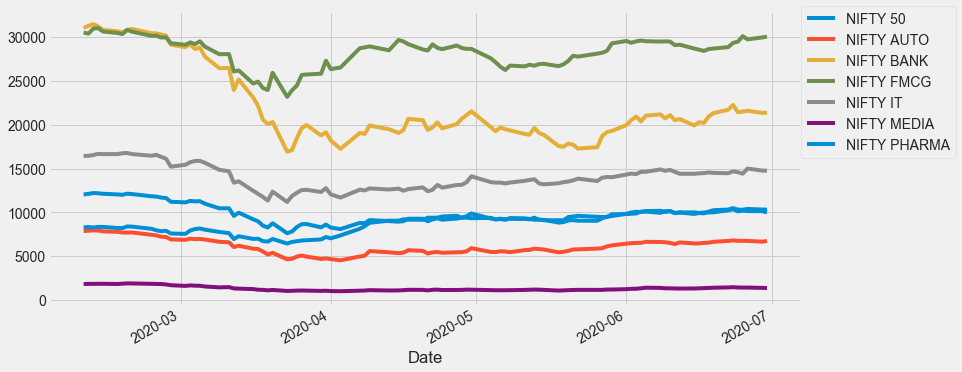

In [9]:
# First let's do a simple display of all plots

for name in csv_files:
    dfs[name[:-4]]['Close'].plot(figsize=(12,6),label=name[:-4].replace('_', ' ').upper())
plt.legend(loc=(1,0.5))
plt.show()

<Mpf_Figure size 1000x700 with 0 Axes>

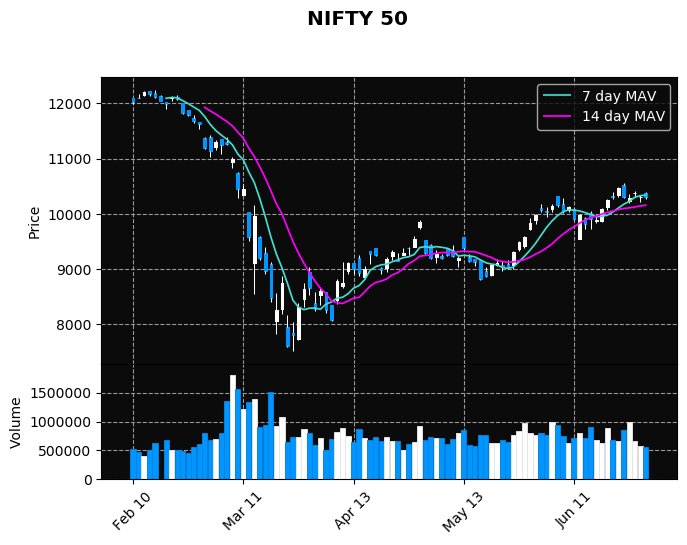

In [10]:
# Since mplfinance is relatively new, we need to define a custom legend. We will use Line2D for that

# Custom legend handles
custom_lines = [Line2D([0], [0], color='#37bfb2', lw=1.5), Line2D([0], [0], color='#db00db', lw=1.5)]


fig = mpf.figure(figsize=(10,7))

# Style to be used
s   = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')

# Plotting the graph : We will plot the candle stick graph for each day, for the 94 days

'''
Type of graph : Candle
Volume = True will plot the volume (in the same color as the candlestick)
returnfig = True will help us use matplotlib.pyplot features in mplfinance
mav = (7,14) will plot the 7 day and 14 day simple moving averages
'''

figure, axes = mpf.plot(dfs['nifty_50'],volume=True, type='candle', title='NIFTY 50', style=s, mav=(7,14), returnfig=True)

# Adding the labels to the legend and turning the label color to white

l = axes[0].legend(custom_lines, ['7 day MAV', '14 day MAV'])
for text in l.get_texts():
    text.set_color("white")
plt.show()

We can see, there is a missing value in the 'Volume' column of NIFTY 50 dataset. To fill this, we can use the average of values of the last 5 days [Note, using volumes from the days ahead isn't a good idea to estimate today's volume]

In [11]:
dfs['nifty_50']['Volume'][5] = 0

In [12]:
print(dfs['nifty_50']['Volume'][5])
for i in range(5):
    dfs['nifty_50']['Volume'][5] += dfs['nifty_50']['Volume'][i]
print(dfs['nifty_50']['Volume'][5]/5)

0
508080.0


We will repeat the same procedure as above for all the sectoral indices now. First, we will plot all separately to show Candlestick chart, MAV and volume about each sectoral index, and then we will display them together for comparison

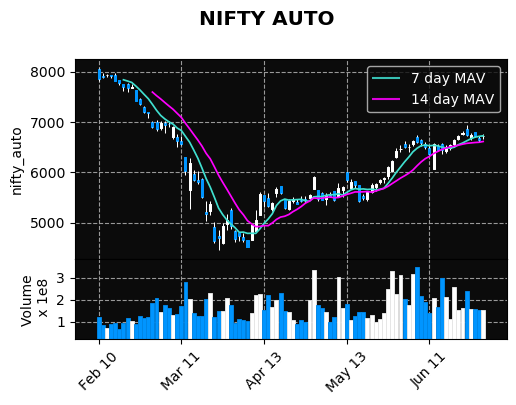

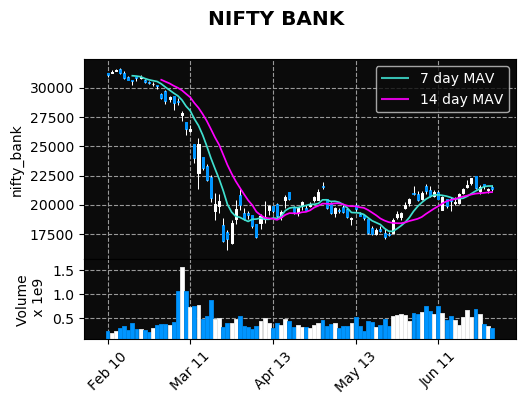

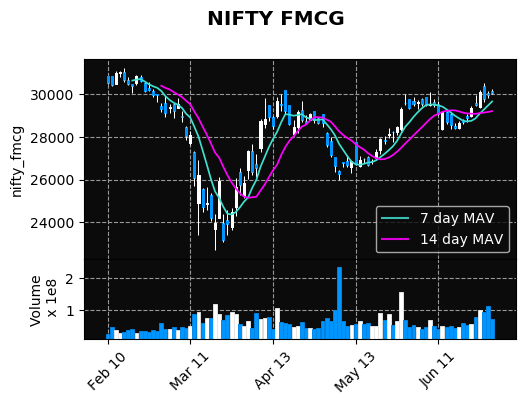

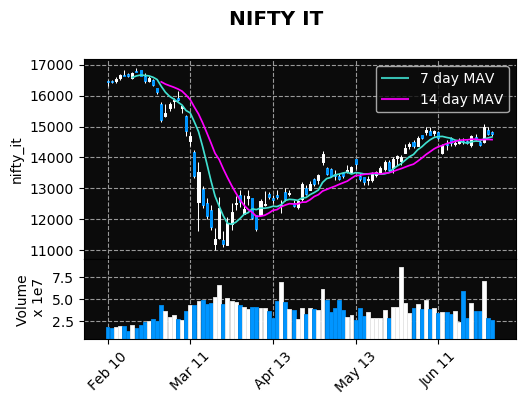

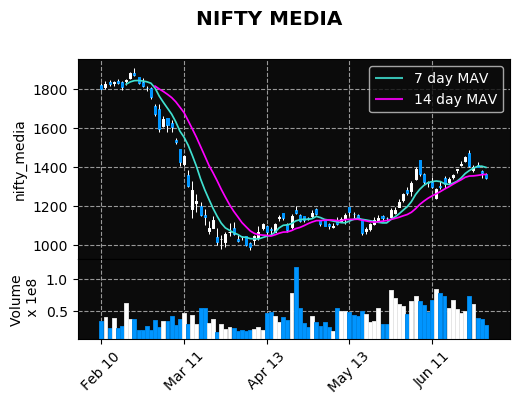

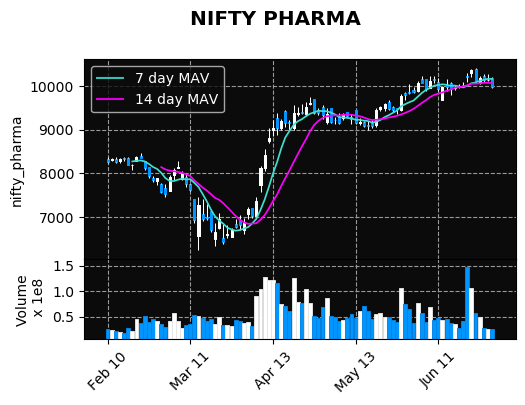

In [13]:
for name in csv_files[1:]:
    
    fig, axes=mpf.plot(dfs[name[:-4]],type='candle',volume=True,
             title=name[:-4].replace('_',' ').upper(),
             ylabel=name[:-4],
             ylabel_lower='Volume', mav=(7,14), style=s,
             returnfig=True, figsize=(6,4))
    
    l = axes[0].legend(custom_lines, ['7 day MAV', '14 day MAV'])
    
    for text in l.get_texts():
        text.set_color("white")

Initial observations (In general about all indices)
1. The stock prices starting falling at the start of February, and kept falling till around March end (around the same time Lockdown 1.0 was announced) 
    1. **Lockdown Phase 1** : 25 March to 14 April
    2. **Lockdown Phase 2** : 15 April to 3 May
    3. **Lockdown Phase 3** : 4 May to 17 May
    4. **Lockdown Phase 4** : 18 May to 31 May
2. After this period, the stock prices started rising and faced another small drop around mid-May, when Lockdown 4.0 was announced

3. In most of the indices, the volume was high at the start of the period when the first downfall of stock prices was happening (and this was before the lockdown period)

To view the above more clearly, we'll plot the line plots of stock prices and see the points where the minimum is occuring. In all cases, it is around 23$^\text{rd}$ March, i.e just before Lockdown started. The stock prices started falling around 20$^{\text{th}}$ Feb <br>
The <span style="color:red">**red**</span> vertical line represents the date (20th Feb) when the stocks start falling.<br>
The <span style="color:black">**black**</span> vertical lines represent the dates (23rd March and 18th April), about the time when lockdowns 1.0 and 4.0 started

In [14]:
csv_files

['nifty_50.csv',
 'nifty_auto.csv',
 'nifty_bank.csv',
 'nifty_fmcg.csv',
 'nifty_it.csv',
 'nifty_media.csv',
 'nifty_pharma.csv']

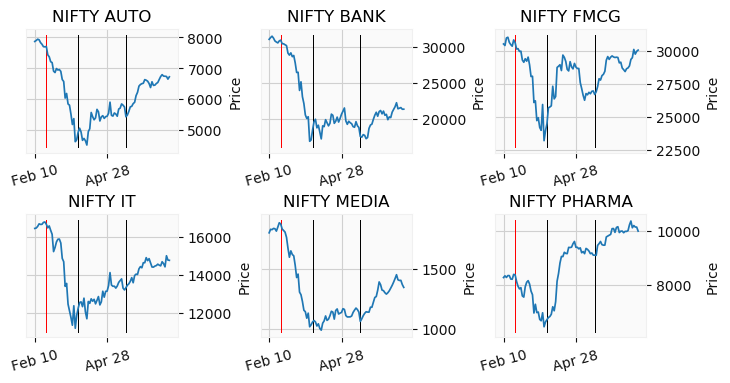

In [15]:
# Making line plots side by side
fig = mpf.figure(figsize=(8,4))
ax = []

for i in range(6):
    ax.append(fig.add_subplot(2,3,i+1,style='yahoo'))

for i in range(6):
    mpf.plot(dfs[csv_files[i+1][:-4]],ax=ax[i],axtitle=csv_files[i+1][:-4].replace('_',' ').upper(),xrotation=15, type='line',
             vlines=dict(vlines=['2020-02-20','2020-03-25', '2020-05-18'],linewidths=(0.5), colors=('r','k','k')))
    
plt.subplots_adjust(hspace=0.5, wspace=0.55)


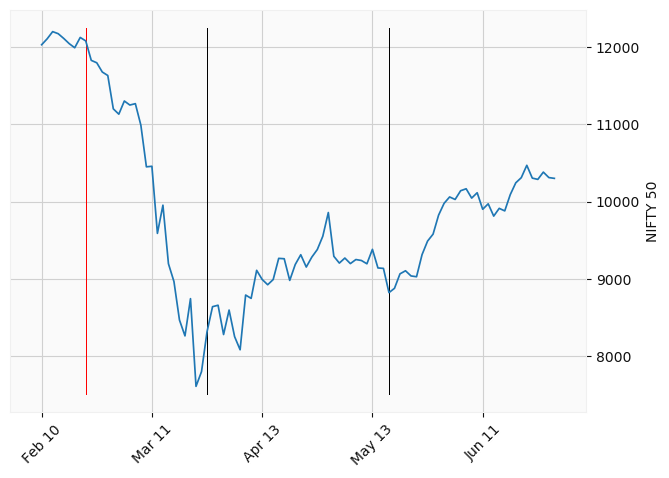

In [16]:
mpf.plot(dfs['nifty_50'], style='yahoo', type='line', 
         vlines=dict(vlines=['2020-02-20','2020-03-25', '2020-05-18'],linewidths=(0.5), colors=('r', 'k', 'k')),
         ylabel='NIFTY 50')

## Sectoral Inference



# RSI calculation

The **relative strength index (RSI)** is a momentum indicator used in technical analysis that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100.<br>
Traditional interpretation and usage of the RSI are that values of 70 or above indicate that a security is becoming **overbought or overvalued** and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates an **oversold or undervalued condition**.

Calculating RSI requires several steps. We will work with RSI$_{14}$, i.e the period of RSI is 14 days.
1. We first calculate the "Up" and "Down" moves. We define the change as $$change = CP_t - CP_{t-1} \quad \text{where CP stands for closing price}$$ Whenever the change is positive, we say its an up move (denoted by $U$), and whenever its negative, we say its a down move(denoted by $D$) (note if change is zero, it is counted as both). In both cases, we take the absolute value of the change

2. In the second step, we average the gains and losses. There are three popular methods to do so :
    1. **Simple moving average** : In this, we just add all the Up moves in the last 14 days, and divide by 14 (i.e take the average) and call this as the average gain. Similarly for the Down moves.<br> 
    <center> $U_{avg} = \dfrac{1}{N}\sum \limits_{\text{last N}} U$ <br> $D_{avg} = \dfrac{1}{N}\sum \limits_{\text{last N}} D$ </center>
    2. **Exponential moving average** : In this, we take a weighted average of the current gain (or Up move) and the previous average gain (similarly for Down move / loss). We take $\alpha = \dfrac{2}{15}$ (i.e $\frac{2}{N+1}$ where $N$ is the period of RSI)
    <center> $U_{avg(t)} \hspace{7pt}= \alpha U_t + (1-\alpha)U_{avg(t-1)}$ <br> $D_{avg(t)} \hspace{7pt}= \alpha D_t + (1-\alpha)D_{avg(t-1)}$ </center>
    3. **Wilder smoothing** : In this, we use the same concept as EMA, but take $\alpha = \dfrac{1}{N} = \dfrac{1}{14}$

In [17]:
# Finding up moves and down moves, and adding them to the datasets
for name in csv_files:
    up_move = [0]
    down_move = [0]
    for i in range(1,94):
        change = (dfs[name[:-4]]['Close'][i] - dfs[name[:-4]]['Close'][i-1]).round(2)
        if change > 0:
            up_move.append(change)
            down_move.append(0)
        elif change < 0 :
            up_move.append(0)
            down_move.append(-1*change)
        else:
            up_move.append(0)
            down_move.append(0)
    dfs[name[:-4]]['Up Moves'] = up_move
    dfs[name[:-4]]['Down Moves'] = down_move

In [18]:
# Checking the values for any of the datasets
dfs['nifty_50'].head(-5)

,Open,High,Low,Close,Volume,Up Moves,Down Moves
Date,,,,,,,
2020-02-10,12102.35,12103.55,11990.75,12031.50,524700,0.00,0.00
2020-02-11,12108.40,12172.30,12099.00,12107.90,480000,76.40,0.00
2020-02-12,12151.00,12231.75,12144.30,12201.20,411700,93.30,0.00
2020-02-13,12219.55,12225.65,12139.80,12174.65,501200,0.00,26.55
2020-02-14,12190.15,12246.70,12091.20,12113.45,622800,0.00,61.20
...,...,...,...,...,...,...,...
2020-06-17,9876.70,10003.60,9833.80,9881.15,685400,0.00,32.85
2020-06-18,9863.25,10111.20,9845.05,10091.65,622900,210.50,0.00
2020-06-19,10119.00,10272.40,10072.65,10244.40,892100,152.75,0.00


In [19]:
''' 
We will be using Wilder's smoothing method to calculate the exponential moving average in order to calculate RSI. The formula
for the same is given above
'''
alpha = 1/14
for name in csv_files:
    avg_gain = [0]*14
    avg_loss = [0]*14
    avg_gain.append((dfs[name[:-4]]['Up Moves'][0:14].sum()/14).round(2))
    avg_loss.append((dfs[name[:-4]]['Down Moves'][0:14].sum()/14).round(2))
    for i in range(15,94):
        curr_avg_gain = alpha * dfs[name[:-4]]['Up Moves'][i] + (1-alpha) * avg_gain[i-1]
        curr_avg_loss = alpha * dfs[name[:-4]]['Down Moves'][i] + (1-alpha) * avg_loss[i-1]
        avg_gain.append(curr_avg_gain.round(2))
        avg_loss.append(curr_avg_loss.round(2))
    dfs[name[:-4]]['Avg Gain'] = avg_gain
    dfs[name[:-4]]['Avg Loss'] = avg_loss

In [20]:
# Relative Strengths
for name in csv_files:
    RS = [0]*14
    for i in range(14,94):
        rs_val = (dfs[name[:-4]]['Avg Gain'][i]/dfs[name[:-4]]['Avg Loss'][i]).round(3)
        RS.append(rs_val)
    dfs[name[:-4]]['Relative Strength'] = RS

In [21]:
#Relative Strength Indices
for name in csv_files:
    RSI = [0]*14
    for i in range(14,94):
        rsi_val = (100 - 100/(1+dfs[name[:-4]]['Relative Strength'][i])).round(2)
        RSI.append(rsi_val)
    dfs[name[:-4]]['Relative Strength Index'] = RSI

In [22]:
# Just to display the RSI
display(dfs['nifty_auto'])

,Open,High,Low,Close,Volume,Up Moves,Down Moves,Avg Gain,Avg Loss,Relative Strength,Relative Strength Index
Date,,,,,,,,,,,
2020-02-10,8065.40,8067.35,7820.30,7860.55,120638033,0.00,0.00,0.00,0.00,0.000,0.00
2020-02-11,7923.00,7969.30,7881.35,7892.40,84781272,31.85,0.00,0.00,0.00,0.000,0.00
2020-02-12,7932.30,7961.10,7905.75,7933.80,71096518,41.40,0.00,0.00,0.00,0.000,0.00
2020-02-13,7930.25,7933.40,7873.75,7914.90,87754381,0.00,18.90,0.00,0.00,0.000,0.00
2020-02-14,7933.60,7977.15,7807.30,7822.20,95722834,0.00,92.70,0.00,0.00,0.000,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,6854.25,6935.75,6727.40,6742.80,237402396,0.00,46.40,58.47,28.63,2.042,67.13
2020-06-25,6681.75,6791.75,6645.15,6737.85,155954852,0.00,4.95,54.29,26.94,2.015,66.83
2020-06-26,6807.40,6808.80,6705.00,6731.45,156655986,0.00,6.40,50.41,25.47,1.979,66.43


Now, we will plot the RSI values along with the candlestick chart, 7,14 day MAV and volume for all the indices

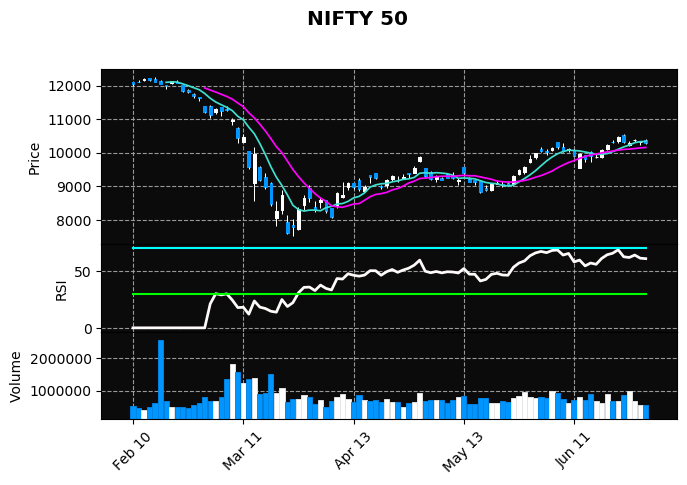

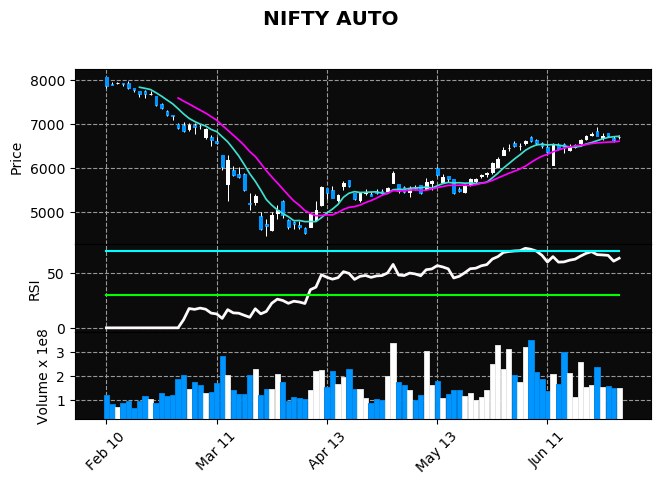

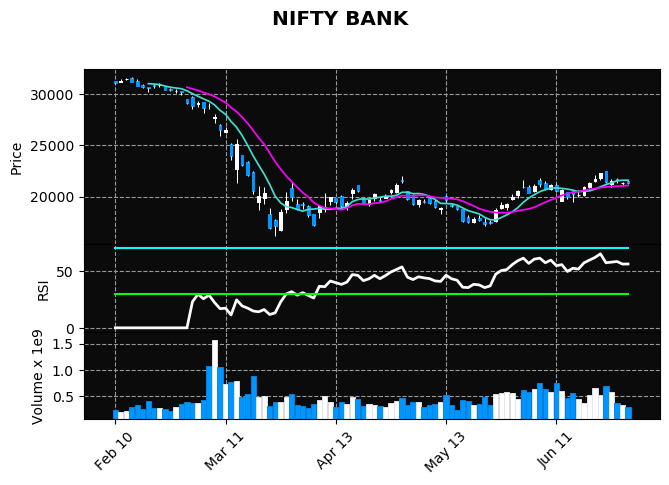

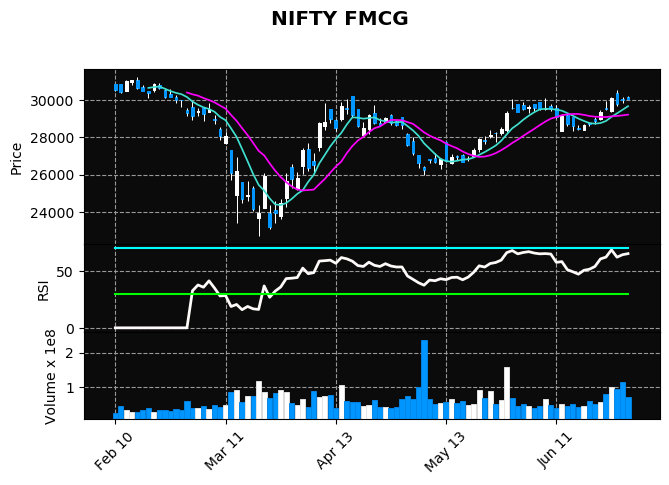

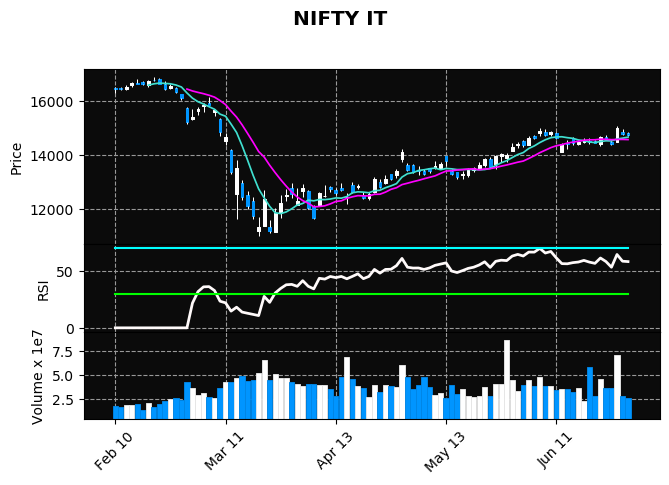

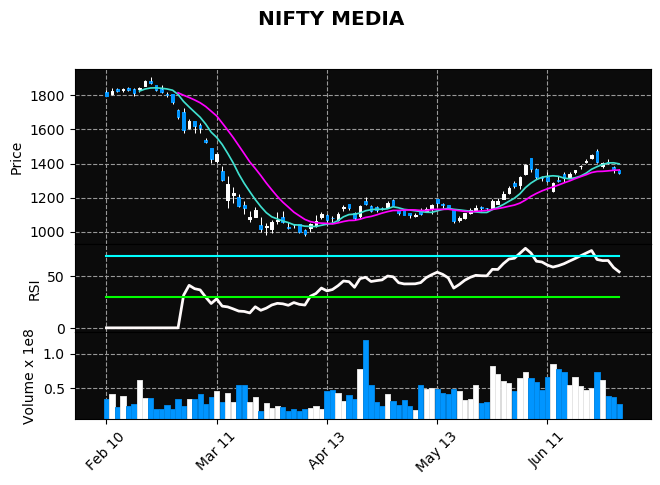

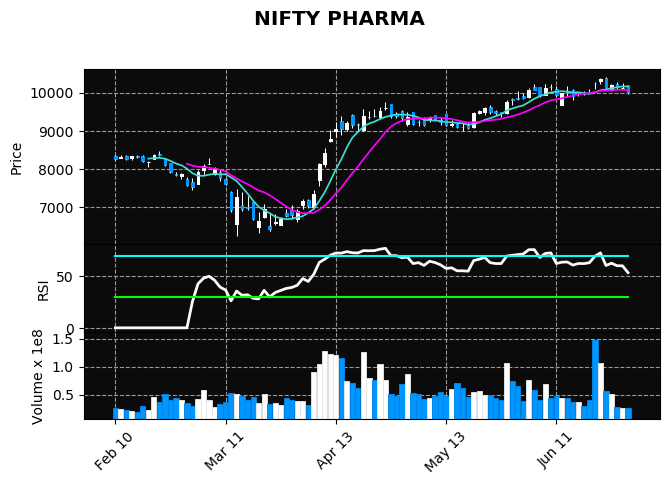

In [23]:
s   = mpf.make_mpf_style(base_mpl_style='fast',base_mpf_style='nightclouds')
for i, name in enumerate(csv_files):
    ap2 = [mpf.make_addplot(dfs[name[:-4]]['Relative Strength Index'],color='snow',panel=1, secondary_y=False, ylabel='RSI'),
           mpf.make_addplot([70]*94,panel='lower',color='cyan', secondary_y=False, width=1.5),
           mpf.make_addplot([30]*94,panel='lower',color='lime', secondary_y=False, width=1.5) ]
    mpf.plot(dfs[name[:-4]],type='candle',main_panel=0,addplot=ap2, panel_ratios=(4,2,2), style=s,figsize=(8,5),
             title=name[:-4].replace('_',' ').upper(), mav=(7,14), volume=True, volume_panel=2)

To further our analysis, let's define a quantity as $r_D$ (dynamic return as follows) : 
At any time $t_i$ for $i \geq 2$, we define $$r_D = \dfrac{CP_{i} - BasePrice}{BasePrice}$$, where $BasePrice = min(CP_{j})$ for  $j \in \{1, \cdot \cdot \cdot, i-1\}$


Then we find the maximum $DR$ and find the day on which the $BasePrice$ was taken. Call this day $j$, and the max DR occured at day $i$. We can write monthly return (MR) as $$MR = (1 + max(DR))^{\frac{30}{i-j}} - 1$$ 
This represents the maximum 

In [24]:
# Calculation of dynamic returns 
for name in csv_files:
    dyn_rets = [0]
    for i in range(1,94):
        min_pt = dfs[name[:-4]]['Close'][0:i].min()
        dyn_ret = ((dfs[name[:-4]]['Close'][i] - min_pt)/min_pt).round(3)
        dyn_rets.append(dyn_ret)
    dfs[name[:-4]]['Dynamic Return'] = dyn_rets

In [25]:
display(dfs['nifty_50'])

,Open,High,Low,Close,Volume,Up Moves,Down Moves,Avg Gain,Avg Loss,Relative Strength,Relative Strength Index,Dynamic Return
Date,,,,,,,,,,,,
2020-02-10,12102.35,12103.55,11990.75,12031.50,524700,0.0,0.00,0.00,0.00,0.000,0.00,0.000
2020-02-11,12108.40,12172.30,12099.00,12107.90,480000,76.4,0.00,0.00,0.00,0.000,0.00,0.006
2020-02-12,12151.00,12231.75,12144.30,12201.20,411700,93.3,0.00,0.00,0.00,0.000,0.00,0.014
2020-02-13,12219.55,12225.65,12139.80,12174.65,501200,0.0,26.55,0.00,0.00,0.000,0.00,0.012
2020-02-14,12190.15,12246.70,12091.20,12113.45,622800,0.0,61.20,0.00,0.00,0.000,0.00,0.007
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24,10529.25,10553.15,10281.95,10305.30,854800,0.0,165.70,82.10,49.22,1.668,62.52,0.354
2020-06-25,10235.55,10361.80,10194.50,10288.90,994200,0.0,16.40,76.24,46.88,1.626,61.92,0.352
2020-06-26,10378.90,10409.85,10311.25,10383.00,671900,94.1,0.00,77.52,43.53,1.781,64.04,0.364


In [26]:
'''
We find the maximum of dynamic returns for each index, find the corresponding date, and using datetime library, find 
the number of days
'''

max_dyn_rets = []
for name in csv_files:
    max_dyn_ret = dfs[name[:-4]]['Dynamic Return'].max()
    max_date = dfs[name[:-4]]['Dynamic Return'].idxmax().to_pydatetime().date()
    min_date = dfs[name[:-4]]['Dynamic Return'][:max_date].idxmin().to_pydatetime().date()
    max_dyn_rets.append([name[:-4],max_dyn_ret, (max_date-min_date).days + 1])

In [27]:
print(max_dyn_rets)

[['nifty_50', 0.376, 104], ['nifty_auto', 0.503, 93], ['nifty_bank', 0.316, 93], ['nifty_fmcg', 0.299, 106], ['nifty_it', 0.341, 107], ['nifty_media', 0.468, 104], ['nifty_pharma', 0.611, 104]]


In [28]:
'''
We find the maximum monthly return for each index
'''

max_monthly_ret = []
for i in range(7):
    max_ret = round(float(pow(1+max_dyn_rets[i][1], 30/max_dyn_rets[i][2]) - 1), 4)
    max_monthly_ret.append([max_dyn_rets[i][0].replace('_', ' ').upper(), max_ret*100])

In [29]:
max_monthly_ret
# We see there is some floating point issue with round()

[['NIFTY 50', 9.64],
 ['NIFTY AUTO', 14.05],
 ['NIFTY BANK', 9.26],
 ['NIFTY FMCG', 7.68],
 ['NIFTY IT', 8.57],
 ['NIFTY MEDIA', 11.709999999999999],
 ['NIFTY PHARMA', 14.75]]

We'll manually round of the nifty_media monthly return value to 11.71

In [30]:
max_monthly_ret[-2][1] = 11.71

In [31]:
max_monthly_ret

[['NIFTY 50', 9.64],
 ['NIFTY AUTO', 14.05],
 ['NIFTY BANK', 9.26],
 ['NIFTY FMCG', 7.68],
 ['NIFTY IT', 8.57],
 ['NIFTY MEDIA', 11.71],
 ['NIFTY PHARMA', 14.75]]

In [32]:
# Pretty printing / displaying the maximum monthly returns

print(tabulate(max_monthly_ret, ['Index', 'Maximum monthly return (%)'], tablefmt="fancy_grid", colalign=('center', 'center')))

╒══════════════╤══════════════════════════════╕
│    Index     │  Maximum monthly return (%)  │
╞══════════════╪══════════════════════════════╡
│   NIFTY 50   │             9.64             │
├──────────────┼──────────────────────────────┤
│  NIFTY AUTO  │            14.05             │
├──────────────┼──────────────────────────────┤
│  NIFTY BANK  │             9.26             │
├──────────────┼──────────────────────────────┤
│  NIFTY FMCG  │             7.68             │
├──────────────┼──────────────────────────────┤
│   NIFTY IT   │             8.57             │
├──────────────┼──────────────────────────────┤
│ NIFTY MEDIA  │            11.71             │
├──────────────┼──────────────────────────────┤
│ NIFTY PHARMA │            14.75             │
╘══════════════╧══════════════════════════════╛


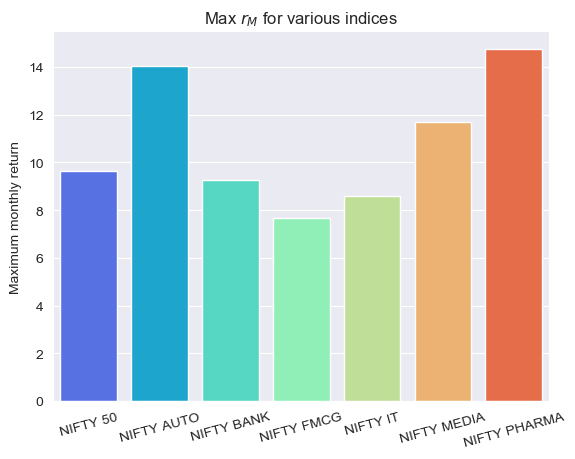

In [33]:
# Here we make a bar plot of the maximum monthly returns of all indices

names = list(map(itemgetter(0), max_monthly_ret ))
dyn_returns = list(map(itemgetter(1), max_monthly_ret))
sns.set_style("darkgrid")
sns.barplot(x=names, y=dyn_returns, palette='rainbow')
plt.title('Max $r_M$ for various indices')
plt.xticks(rotation=15)
plt.ylabel('Maximum monthly return')
plt.show()

In [34]:
max_dynamic_return =  list(map(itemgetter(1), max_dyn_rets ))
max_dynamic_return

[0.376, 0.503, 0.316, 0.299, 0.341, 0.468, 0.611]

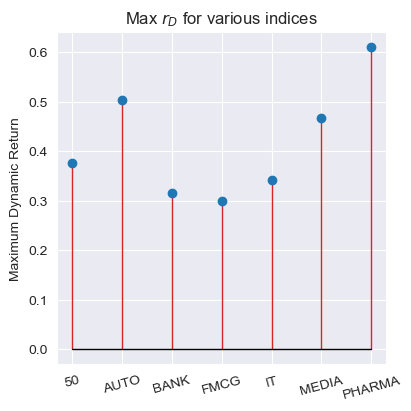

In [35]:
names_cut = [i[6:] for i in names]
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
ax.set(title="Max $r_D$ for various indices")
markerline, stemline, baseline = ax.stem(names_cut, max_dynamic_return,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
ax.set_ylabel('Maximum Dynamic Return')
plt.setp(ax.get_xticklabels(), rotation=15)
plt.show()

# Number of COVID-19 Cases daily

We are seeing this, to notice the fact that the number of cases has affected the sectors adversely. The rise in number of cases (i.e second wave of COVID-19), caused a dip in stock prices 

In [36]:
covid_india = pd.read_csv('archive/India COVID-19.csv')

In [37]:
covid_india.head()

,Unnamed: 0,Date,Country,Confirmed,Recovered,Deaths
0,19750,2020-01-22,India,0,0,0
1,19751,2020-01-23,India,0,0,0
2,19752,2020-01-24,India,0,0,0
3,19753,2020-01-25,India,0,0,0
4,19754,2020-01-26,India,0,0,0


In [38]:
covid_india.drop('Unnamed: 0', axis=1, inplace=True)

In [39]:
covid_india.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,India,0,0,0
1,2020-01-23,India,0,0,0
2,2020-01-24,India,0,0,0
3,2020-01-25,India,0,0,0
4,2020-01-26,India,0,0,0


In [40]:
print(np.where(covid_india['Date']=='2020-03-10'))
print(np.where(covid_india['Date']=='2020-05-30'))

(array([48], dtype=int64),)
(array([129], dtype=int64),)


In [41]:
covid_india = covid_india.iloc[48:130]
dates_ = covid_india['Date']
covid_india['Date'] = pd.to_datetime(covid_india['Date'])
covid_india = covid_india.set_index('Date')

In [42]:
display(covid_india)

,Country,Confirmed,Recovered,Deaths
Date,,,,
2020-03-10,India,56,4,0
2020-03-11,India,62,4,1
2020-03-12,India,73,4,1
2020-03-13,India,82,4,2
2020-03-14,India,102,4,2
...,...,...,...,...
2020-05-26,India,150793,64277,4344
2020-05-27,India,158086,67749,4534
2020-05-28,India,165386,70920,4711


In [43]:
# To get daily confirmed
daily_conf = [3]
daily_rec = [0]
daily_death = [0]
for i in range(1,82):
    daily_conf.append(covid_india['Confirmed'][i] - covid_india['Confirmed'][i-1])
    daily_rec.append(covid_india['Recovered'][i] - covid_india['Recovered'][i-1])
    daily_death.append(covid_india['Deaths'][i] - covid_india['Deaths'][i-1])
covid_india['Daily Recovered'] = daily_rec
covid_india['Daily Confirmed'] = daily_conf
covid_india['Daily Deaths'] = daily_death

In [44]:
display(covid_india)

,Country,Confirmed,Recovered,Deaths,Daily Recovered,Daily Confirmed,Daily Deaths
Date,,,,,,,
2020-03-10,India,56,4,0,0,3,0
2020-03-11,India,62,4,1,0,6,1
2020-03-12,India,73,4,1,0,11,0
2020-03-13,India,82,4,2,0,9,1
2020-03-14,India,102,4,2,0,20,0
...,...,...,...,...,...,...,...
2020-05-26,India,150793,64277,4344,3571,5843,172
2020-05-27,India,158086,67749,4534,3472,7293,190
2020-05-28,India,165386,70920,4711,3171,7300,177


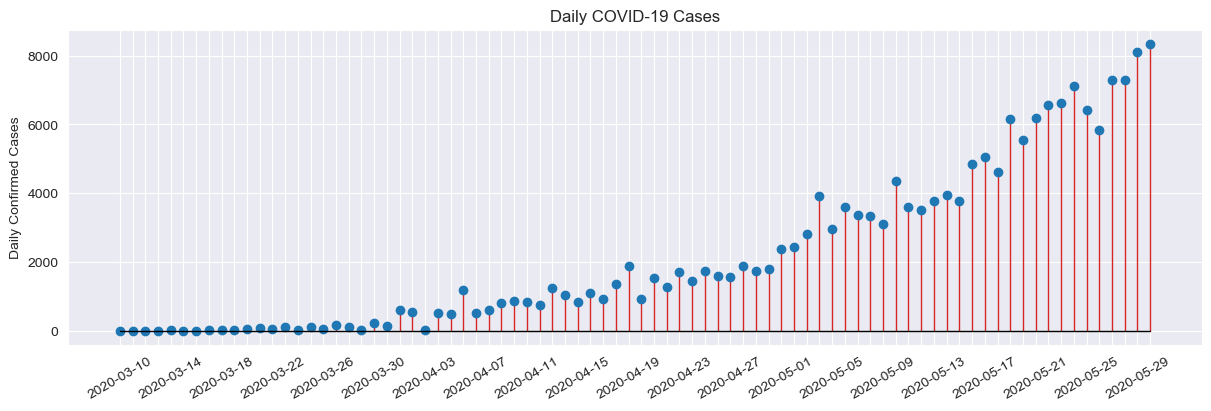

In [45]:
fig, ax = plt.subplots(figsize=(12,4), constrained_layout=True)
ax.set(title="Daily COVID-19 Cases")
markerline, stemline, baseline = ax.stem(dates_, covid_india['Daily Confirmed'],
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
every_nth = 4
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
ax.set_ylabel('Daily Confirmed Cases')
plt.setp(ax.get_xticklabels(), rotation=30)
plt.show()